In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [2]:
# Load the dataset
file_path = "./data/dataset.csv"  # Change this to your actual file path
df = pd.read_csv(file_path, parse_dates=['Datetime'], index_col='Datetime')

In [3]:
# Display basic info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None


In [4]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.090280e+00           1.236492e-01  2.408328e+02   
std           1.052628e+00           1.124194e-01  3.237763e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.389900e+02   
50%           6.140000e-01           1.000000e-01  2.410000e+02   
75%           1.528000e+00           1.940000e-01  2.428700e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.621481e+00    1.109485e+00    1.289229e+00    6.442386e+00  
std        4.424361e+00    6.115843e+00    5.786613e+00    8.415860e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%  

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


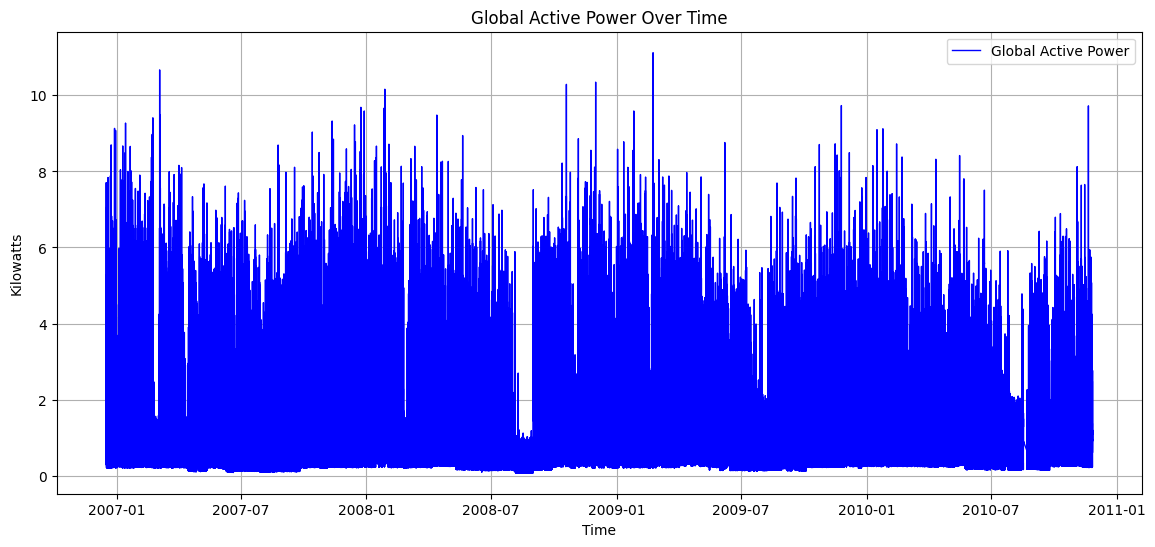

In [6]:
# Plot Global Active Power over time
plt.figure(figsize=(14, 6))
plt.plot(df['Global_active_power'], label='Global Active Power', color='blue', linewidth=1)
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Kilowatts')
plt.legend()
plt.grid()
plt.show()

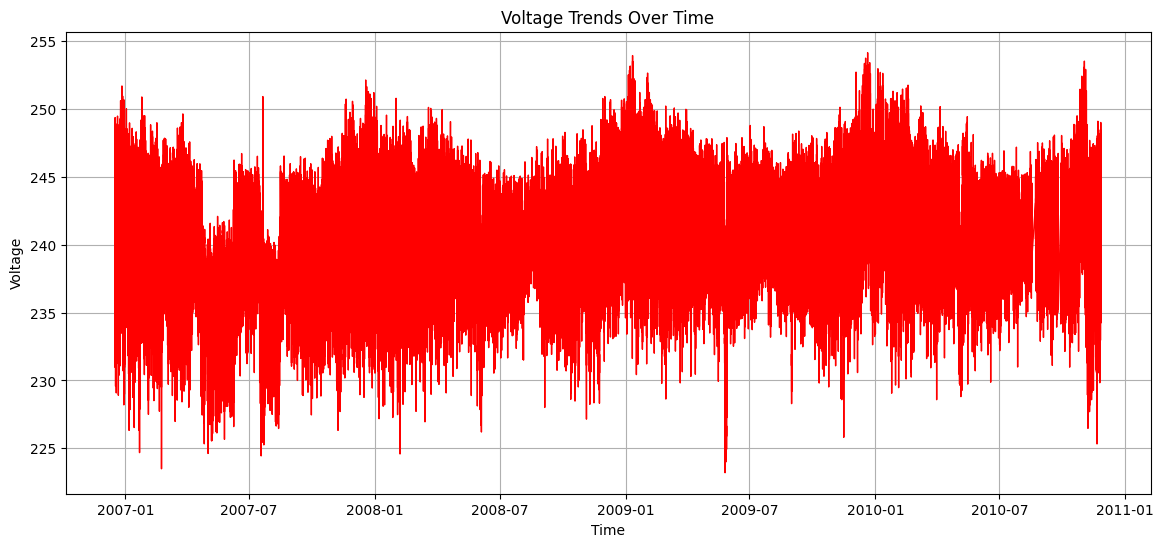

In [7]:
# Voltage Trends
plt.figure(figsize=(14, 6))
plt.plot(df['Voltage'], color='red', linewidth=1)
plt.title('Voltage Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.grid()
plt.show()

/home/vajradevam/Code/miniproject/VENV/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


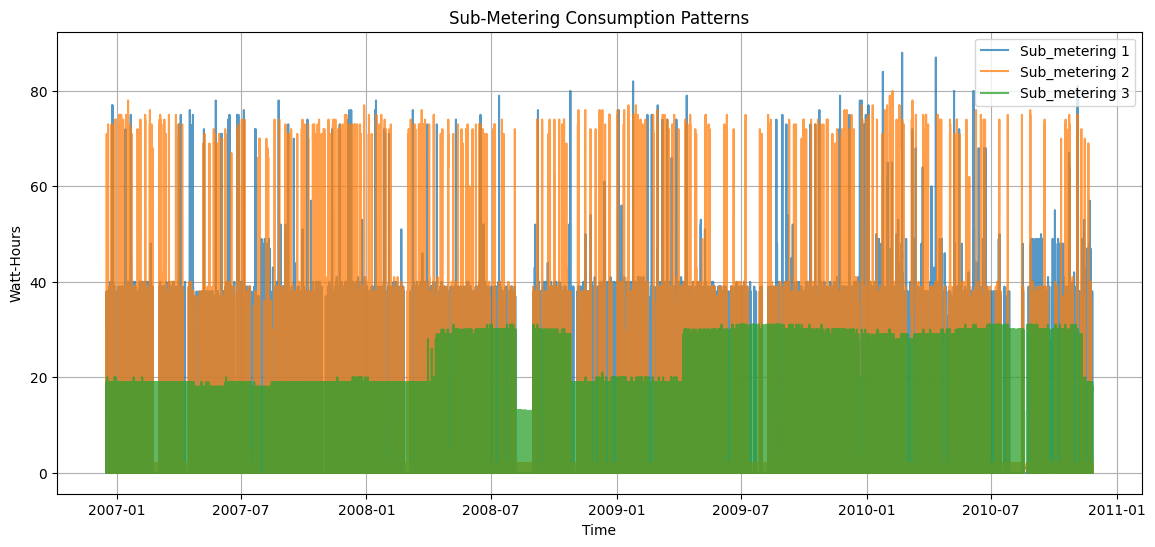

In [8]:
# Sub-metering Consumption Patterns
plt.figure(figsize=(14, 6))
plt.plot(df['Sub_metering_1'], label='Sub_metering 1', alpha=0.75)
plt.plot(df['Sub_metering_2'], label='Sub_metering 2', alpha=0.75)
plt.plot(df['Sub_metering_3'], label='Sub_metering 3', alpha=0.75)
plt.title('Sub-Metering Consumption Patterns')
plt.xlabel('Time')
plt.ylabel('Watt-Hours')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Rolling Mean and Standard Deviation
rolling_window = 50  # Adjust based on time resolution
df['rolling_mean'] = df['Global_active_power'].rolling(window=rolling_window).mean()
df['rolling_std'] = df['Global_active_power'].rolling(window=rolling_window).std()

/home/vajradevam/Code/miniproject/VENV/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


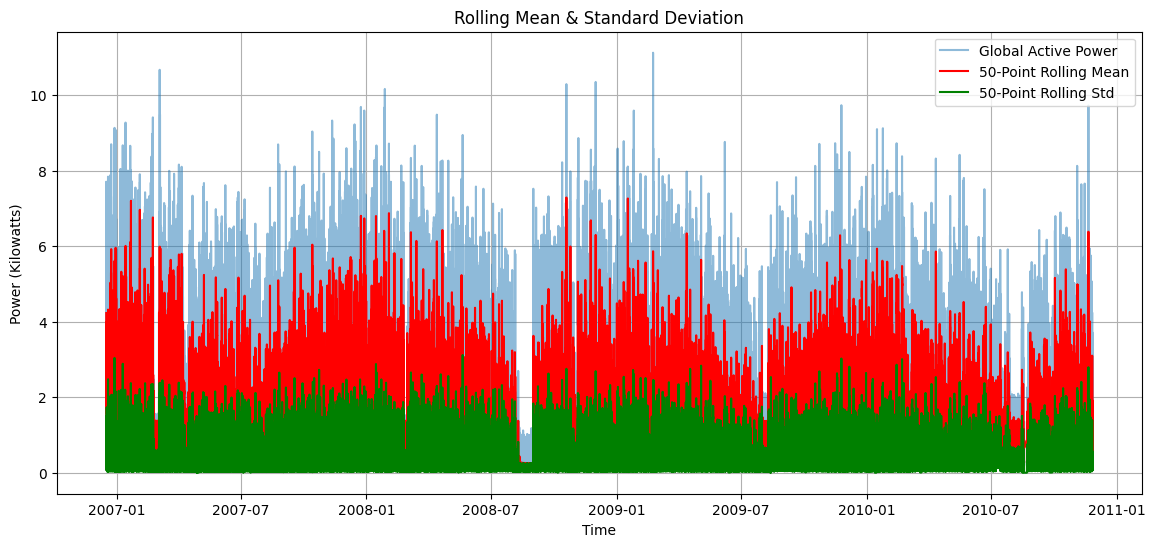

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(df['Global_active_power'], label='Global Active Power', alpha=0.5)
plt.plot(df['rolling_mean'], label=f'{rolling_window}-Point Rolling Mean', color='red')
plt.plot(df['rolling_std'], label=f'{rolling_window}-Point Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Power (Kilowatts)')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Seasonal Decomposition
decompose_result = seasonal_decompose(df['Global_active_power'].dropna(), model='additive', period=1440)  # 1-minute intervals, 1440 per day

<Figure size 1200x800 with 0 Axes>

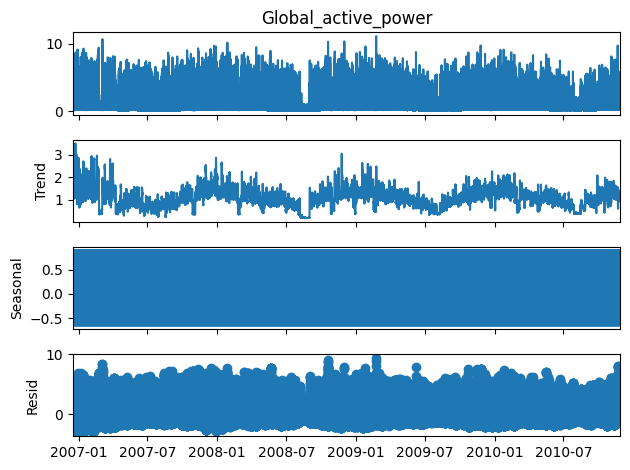

In [12]:
plt.figure(figsize=(12, 8))
decompose_result.plot()
plt.show()